In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from ucimlrepo import fetch_ucirepo
import scipy.stats as stats

## Funciones definidas para bordar los problemas 

In [2]:
def snake2pascal (arr:list[str])-> list:
    """

    Convert snake_case to PascalCase

    Parameters
    ----------
    arr : list
        List of strings in snake_case

    Returns
    -------
    list of strings in PascalCase

    """
    
    splitter = lambda x: x.split('_')
    joiner = lambda x: ''.join(x)
    pascal = lambda x: joiner([word.capitalize() for word in splitter(x)])
    
    return [pascal(word) for word in arr]


def get_repo(id: int)-> dict:
    """
    Fetch dataset from UCI ML Repository

    Parameters
    ----------

    id : int
        Dataset ID
    
    Returns
    -------
    dict
        Dictionary of dataset information

    """
    dataset = fetch_ucirepo(id=id)
    X = dataset.data.features
    y = dataset.data.targets

    data = pd.DataFrame(np.concatenate((y, X), axis=1))
    data.columns = snake2pascal(dataset.variables['name'][1:].values)
    
    name2pascal = lambda arr: [word.split('_').capitalize() for word in arr]
    return data

def get_csv(url: str)-> pd.DataFrame:
    """
    Fetch dataset from URL

    Parameters
    ----------
    url : str
        URL of the dataset
    
    Returns
    -------
    pd.DataFrame
        DataFrame of the dataset
        
    """
    data = pd.read_csv(url)
    data = data.iloc[:,1:]
    data.columns = snake2pascal(data.columns)

    return data

def julian_day (date: str)-> int:
    """
    Convert date to Julian day

    Parameters
    ----------
    date : str
        Date in the format 'YYYY-MM-DD'
    
    Returns
    -------
    int
        Julian day of the date

    """

    date = date.split(' ')
    year, month, day = [int(x) for x in date[0].split('-')]
    a = (14 - month) // 12
    y = year + 4800 - a
    m = month + 12*a - 3
    return day + (153*m + 2) // 5 + 365*y + y//4 - y//100 + y//400 - 32045

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:

1. Leer el dataset desde el github.

In [3]:
currency = get_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv')

2. Definir como indice la columna time

In [4]:
currency.index = pd.to_datetime(pd.to_datetime(currency['Time']))
currency = currency.drop(columns=['Time'])
currency.head()

,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
Time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


* Se aplicó el pascal case desde el inicio

3. Obtenga información del data frame.

In [5]:
currency.describe()

,Open,High,Low,Close,TickVolume,Spread,RealVolume,Meancloseopen,DiffClose,DiffOpen,DiffMeancloseopen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


Se observa entonces un total de 5000 registros con los caracteristicos de las distribuciones de cada una de las variables, junto con los valores de sus respectivos cuartiles 

4. Determine si hay null, nan en el data frame.

In [6]:
currency.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
TickVolume           0
Spread               0
RealVolume           0
Meancloseopen        0
DiffClose            0
DiffOpen             0
DiffMeancloseopen    0
dtype: int64

No hay datos faltantes en ningun registro

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

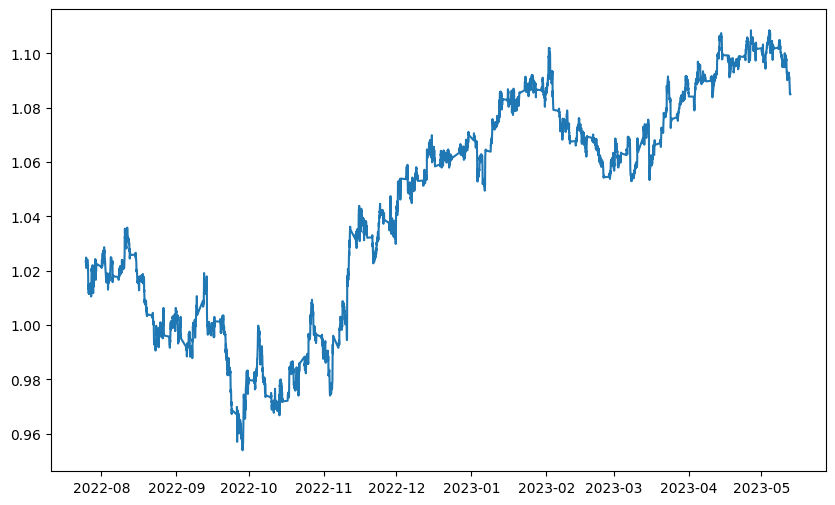

In [7]:
plt.figure(figsize=(10,6))
closed =  pd.DataFrame(currency['Close'])
plt.plot(closed['Close'])

Se observa un valor fluctuante, pero con tendecia al incremento a lo largo de los meses en el precio de cierre

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:

* Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.

* Para la nueva columna construya un histograma de los datos.

* Determine la mejor distribucion estadística que se ajusta al histograma anterior,

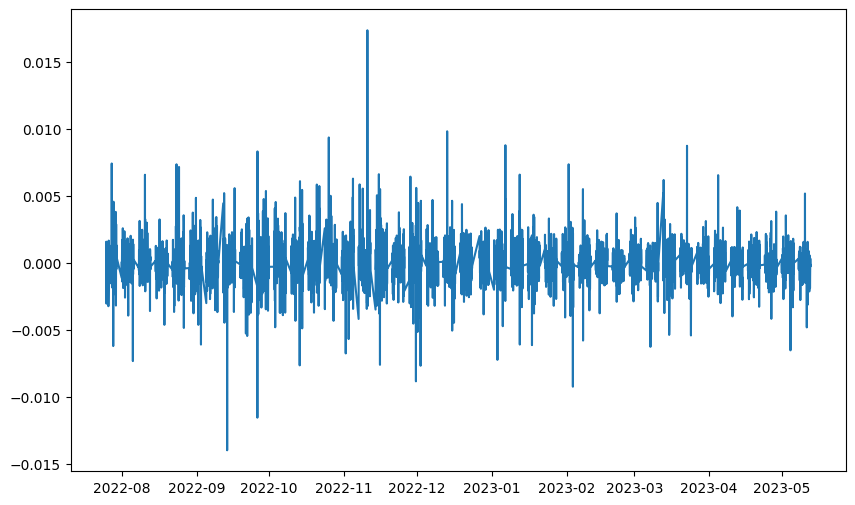

In [8]:
diff = [0] + [closed['Close'].iloc[i] - closed['Close'].iloc[i-1] for i in range(1, len(closed))]
closed['DiffPrice'] = diff

plt.figure(figsize=(10,6))
plt.plot(closed['DiffPrice'])

al igual que el precio de cierre, tambien se observa un valor fluctuante, pero siempre alrededor del cero, indicando que en promedio la diferencia de precios entre horas no está cambiando.

Ahora, se calcula la distribucion normal que mejor se ajusta a la diferencia de precios para comprobar esto

Valor Medio (mu): 1.2298000000000008e-05, Desviacion estandar (std): 0.0014003393514416419


Text(0.5, 1.0, 'Ajuste de la dsitribucion: mu = 0.00,  std = 0.00')

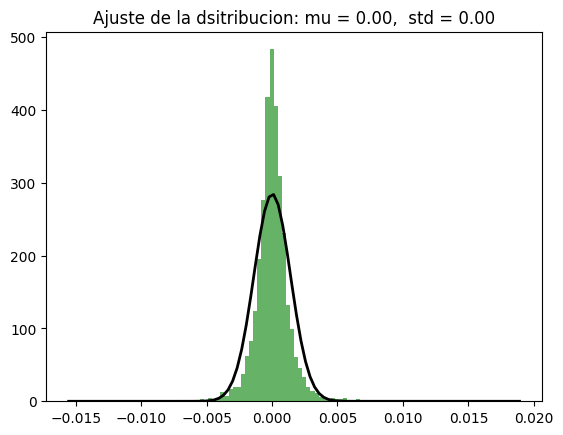

In [9]:
mu, std = stats.norm.fit(closed['DiffPrice'])

# Print the parameters
print(f"Valor Medio (mu): {mu}, Desviacion estandar (std): {std}")

plt.hist(closed['DiffPrice'], bins=100, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Ajuste de la dsitribucion: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

Como se esperaba, el promedio de la diferencia entre precios sigue una distribucion normal centrada en cero, o sea, en promedio no se esperan cambios en el precio entre dos horas consecutivas

7. Para el data frame, seleccionemos solo los datos del 2023.

In [10]:
closed['JulianDay'] = [julian_day(str(date)) for date in closed.index] #probablemente pandas tenga un metodo equivalente

min_date = '01-01-2023 00:00:00'
max_date = '01-01-2024 00:00:00'

closed_2023 = closed.loc[(closed.index >= min_date) & (closed.index < max_date)].drop(columns=['JulianDay'])
closed_2023.shape, closed_2023.head()


((2278, 2),
                        Close  DiffPrice
 Time                                   
 2023-01-02 00:00:00  1.06796   -0.00200
 2023-01-02 01:00:00  1.06965    0.00169
 2023-01-02 02:00:00  1.07058    0.00093
 2023-01-02 03:00:00  1.06896   -0.00162
 2023-01-02 04:00:00  1.06880   -0.00016)

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

In [11]:
closed_monthly = closed_2023.groupby(pd.Grouper(freq='ME'))
closed_biweekly = closed_2023.groupby(pd.Grouper(freq='15D'))
close_weekly = closed_2023.groupby(pd.Grouper(freq='W'))

In [12]:
closed_monthly.mean(), closed_biweekly.mean(), close_weekly.mean()

(               Close  DiffPrice
 Time                           
 2023-01-31  1.077463   0.000031
 2023-02-28  1.071167  -0.000060
 2023-03-31  1.070874   0.000049
 2023-04-30  1.096051   0.000036
 2023-05-31  1.098980  -0.000069,
                Close  DiffPrice
 Time                           
 2023-01-02  1.069361   0.000047
 2023-01-17  1.085565   0.000015
 2023-02-01  1.077679  -0.000066
 2023-02-16  1.063150  -0.000034
 2023-03-03  1.063186   0.000026
 2023-03-18  1.080936   0.000074
 2023-04-02  1.093090   0.000063
 2023-04-17  1.099084  -0.000006
 2023-05-02  1.098889  -0.000059,
                Close  DiffPrice
 Time                           
 2023-01-08  1.059972  -0.000047
 2023-01-15  1.076002   0.000156
 2023-01-22  1.082041   0.000020
 2023-01-29  1.088414   0.000010
 2023-02-05  1.089281  -0.000062
 2023-02-12  1.073363  -0.000097
 2023-02-19  1.069648   0.000014
 2023-02-26  1.063374  -0.000124
 2023-03-05  1.060854   0.000073
 2023-03-12  1.060234   0.000004
 2023-03

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.

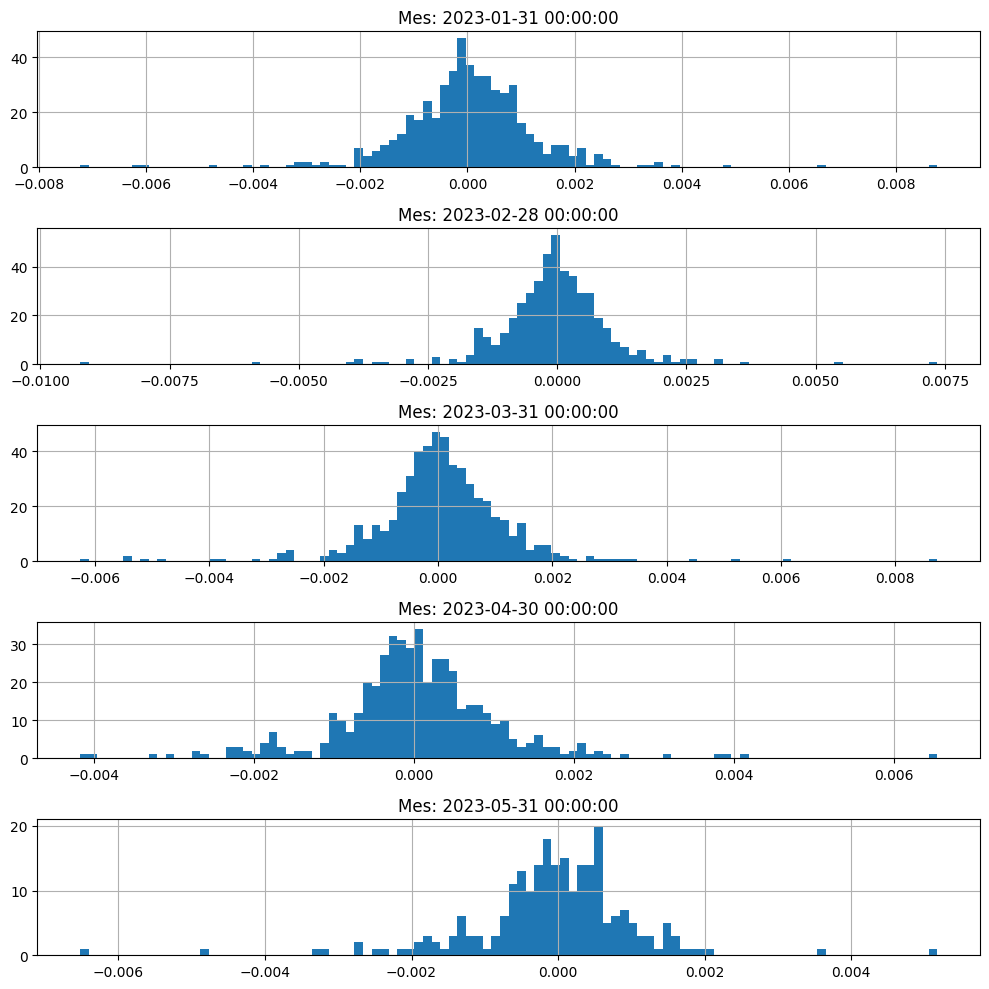

In [13]:
# histogramas por mes

Nmonths = closed_monthly.mean().shape[0]

fig, axs = plt.subplots(Nmonths, 1, figsize=(10, 10))

for i, (month, data) in enumerate(closed_monthly):
    data['DiffPrice'].hist(ax=axs[i], bins=100)
    axs[i].set_title(f'Mes: {month}')

plt.tight_layout()
plt.show()


## Analsis de los datos con pandas

Para el siguiente dataset realizar lo siguiente:

1. Leer los datos desde una página web.
2. Renombrar las columnas en formato PascalCase.

In [15]:
breast_cancer = get_repo(17) #al momento de la entrega, la pagina estaba caida, no se podia leer los datos
breast_cancer.head()

ConnectionError: Error connecting to server

3. Utilizar los métodos head(), tail(), describe() e info() para obtener información sobre el DataFrame.

In [283]:
breast_cancer.head()

,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
2,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
4,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678


In [284]:
breast_cancer.tail()

,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,M,21.56,22.39,142.0,1479.0,0.111,0.1159,0.2439,0.1389,0.1726,...,25.45,26.4,166.1,2027.0,0.141,0.2113,0.4107,0.2216,0.206,0.07115
565,M,20.13,28.25,131.2,1261.0,0.0978,0.1034,0.144,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.6,28.08,108.3,858.1,0.08455,0.1023,0.09251,0.05302,0.159,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782
567,M,20.6,29.33,140.1,1265.0,0.1178,0.277,0.3514,0.152,0.2397,...,25.74,39.42,184.6,1821.0,0.165,0.8681,0.9387,0.265,0.4087,0.124
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039


In [285]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Diagnosis          569 non-null    object
 1   Radius1            569 non-null    object
 2   Texture1           569 non-null    object
 3   Perimeter1         569 non-null    object
 4   Area1              569 non-null    object
 5   Smoothness1        569 non-null    object
 6   Compactness1       569 non-null    object
 7   Concavity1         569 non-null    object
 8   ConcavePoints1     569 non-null    object
 9   Symmetry1          569 non-null    object
 10  FractalDimension1  569 non-null    object
 11  Radius2            569 non-null    object
 12  Texture2           569 non-null    object
 13  Perimeter2         569 non-null    object
 14  Area2              569 non-null    object
 15  Smoothness2        569 non-null    object
 16  Compactness2       569 non-null    object
 1

In [286]:
breast_cancer.describe()

,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569,569.00,569.00,569.00,569.0,569.0000,569.0000,569.0,569.0,569.0000,...,569.00,569.00,569.0,569.0,569.0000,569.0000,569.0,569.0,569.0000,569.00000
unique,2,456.00,479.00,522.00,539.0,474.0000,537.0000,537.0,542.0,432.0000,...,457.00,511.00,514.0,544.0,411.0000,529.0000,539.0,492.0,500.0000,535.00000
top,B,12.34,20.52,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1714,...,12.36,27.26,117.7,472.4,0.1347,0.3416,0.0,0.0,0.2226,0.07427
freq,357,4.00,3.00,3.00,3.0,5.0000,3.0000,13.0,13.0,4.0000,...,5.00,3.00,3.0,2.0,4.0000,3.0000,13.0,13.0,3.0000,3.00000


Se observa entonces que el dataset tiene un total de 569 registros, donde se evidencia que todas las variables regresoras son de tipo continuo, mientras que el target es una variable indicadora que da cuenta de dos tipos distintos de celulas cancerigenas.

4. Contabilizar la cantidad de valores nulos (null o NaN) en el DataFrame. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

In [287]:
Nas = breast_cancer.isna().sum()
print('Valores faltantes:', f'{Nas}', sep='\n\n')
print(f'\n\nTotal de valores faltantes: {Nas.sum()}')

Valores faltantes:

Diagnosis            0
Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
dtype: int64


Total de valores faltantes: 0


*no se detectan valores faltantes en ningun campo 

5. Identificar los valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método unique() para mostrar estos valores.

In [288]:
breast_cancer['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

Hay solo 2 tipos de celulas en este estudio, las tipo M y las tipo B

6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot():

<Axes: xlabel='count', ylabel='Diagnosis'>

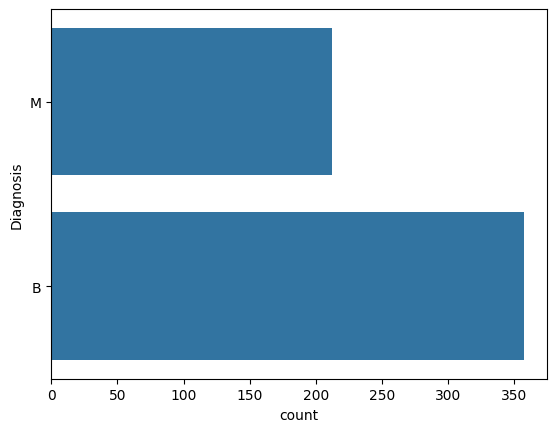

In [289]:
sns.countplot(breast_cancer['Diagnosis'])

7. Agregar una nueva columna llamada DiagnosisNumeric donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).

In [290]:
breast_cancer['DiagnosisNumeric'] = breast_cancer['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
breast_cancer.groupby('DiagnosisNumeric').size()

DiagnosisNumeric
0    357
1    212
dtype: int64

Se tienen entonces 357 celulas tipo B frente a 212 que resultan ser malignas "M"

Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:
(x - mean(x)) / std(x)


In [291]:
for column in breast_cancer.columns[1:]:
    
    breast_cancer[column] =(breast_cancer[column]-breast_cancer[column].mean())/ breast_cancer[column].std()

breast_cancer.head()

,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,DiagnosisNumeric
0,M,1.0961,-2.071512,1.268817,0.98351,1.567087,3.280628,2.650542,2.530249,2.215566,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1.296535
1,M,1.828212,-0.353322,1.684473,1.90703,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.14662,1.086129,-0.243675,0.280943,1.296535
2,M,1.578499,0.455786,1.565126,1.557513,0.941382,1.052,1.36228,2.03544,0.938859,...,-0.023953,1.346291,1.455004,0.526944,1.08198,0.854222,1.953282,1.151242,0.201214,1.296535
3,M,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,0.133866,-0.24972,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1.296535
4,M,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.61264,0.728618,-0.86759,-0.396751,1.296535


8. Agrupar características similares y calcular su promedio. 
9. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  

In [308]:
#patterns = X.columns.str.extract(r'^([a-zA-Z_]+)')[0]
pattern = lambda x: re.match(r'^[a-zA-Z_]+', x).group(0)

# Create a dictionary to store the grouped columns
grouped_columns = {}

# Iterate over the columns and group them by their base name
for col in breast_cancer.columns[1:]:
    base_name = pattern(col)
    if base_name not in grouped_columns:
        grouped_columns[base_name] = []
    grouped_columns[base_name].append(col)

# Calculate the average for each group and store it in a new DataFrame
averages = {}
for base_name, cols in grouped_columns.items():
    averages[base_name+'Mean'] = breast_cancer[cols].mean(axis=1)

averages_breast_cancer =  pd.DataFrame(averages)
averages_breast_cancer.head()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean,DiagnosisNumericMean
0,1.822892,-1.33146,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454,1.296535
1,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767,1.296535
2,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286,1.296535
3,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.34392,1.573617,1.579444,4.544703,3.960995,1.296535
4,1.438539,-1.135278,1.461481,1.411195,0.66075,0.05909,0.936729,1.099685,-0.412639,-0.153272,1.296535


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'RadiusMean'),
  Text(1, 0, 'TextureMean'),
  Text(2, 0, 'PerimeterMean'),
  Text(3, 0, 'AreaMean'),
  Text(4, 0, 'SmoothnessMean'),
  Text(5, 0, 'CompactnessMean'),
  Text(6, 0, 'ConcavityMean'),
  Text(7, 0, 'ConcavePointsMean'),
  Text(8, 0, 'SymmetryMean'),
  Text(9, 0, 'FractalDimensionMean')])

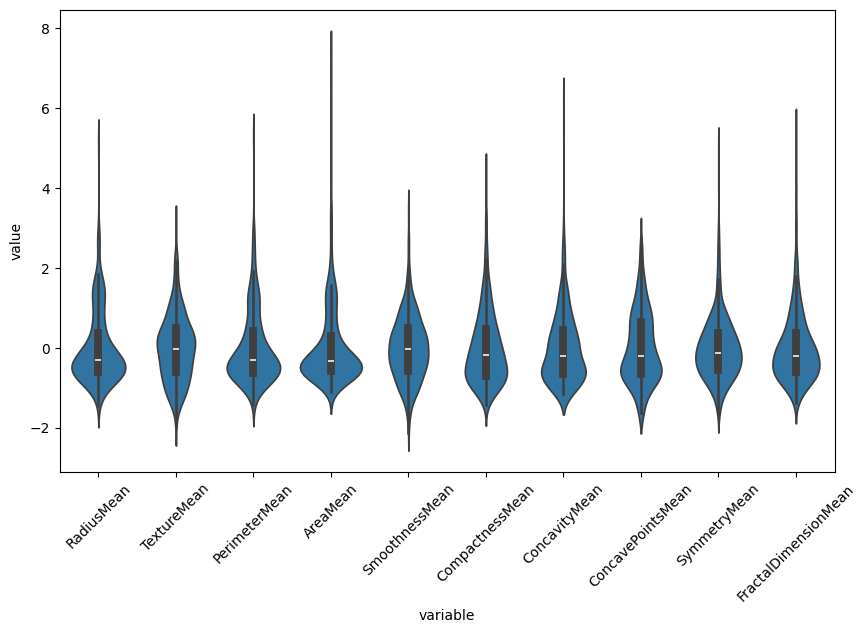

In [304]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='variable', y='value', data=pd.melt(df))
plt.xticks(rotation=45)

In [307]:
averages_breast_cancer

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean,DiagnosisNumericMean
0,1.822892,-1.33146,2.133644,1.822793,0.886604,2.403566,1.827201,1.828182,2.037172,1.698454,1.296535
1,1.377122,-0.532558,1.160448,1.512536,-0.602112,-0.536342,-0.203612,0.631241,-0.349009,-0.228767,1.296535
2,1.438879,-0.115855,1.253866,1.397605,0.390527,0.982746,0.809797,1.804099,0.775643,0.032286,1.296535
3,-0.241121,0.092354,-0.185181,-0.533818,2.453684,3.34392,1.573617,1.579444,4.544703,3.960995,1.296535
4,1.438539,-1.135278,1.461481,1.411195,0.66075,0.05909,0.936729,1.099685,-0.412639,-0.153272,1.296535
...,...,...,...,...,...,...,...,...,...,...,...
564,2.262762,0.303132,2.062496,2.319074,0.834796,0.045809,1.091639,2.004001,-0.936231,-0.490281,1.296535
565,1.512694,2.129283,1.397014,1.502133,-0.337297,-0.160662,0.393593,0.934487,-0.312618,-0.840309,1.296535
566,0.482422,1.053425,0.509009,0.395171,-0.675876,0.324159,0.294468,0.377003,-0.934205,-0.392078,1.296535
567,1.651053,1.751949,1.906541,1.464675,0.926916,3.062208,2.59666,1.909844,1.459686,1.387908,1.296535


In [311]:
corr = averages_breast_cancer.corr()
corr

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean,DiagnosisNumericMean
RadiusMean,1.000000,0.256824,0.991427,0.983948,0.129467,0.455363,0.551518,0.756018,0.167383,-0.036127,0.745954
TextureMean,0.256824,1.000000,0.265161,0.237507,0.103908,0.235962,0.248010,0.238030,0.135053,0.097860,0.341047
PerimeterMean,0.991427,0.265161,1.000000,0.976470,0.146272,0.515278,0.593677,0.788247,0.198767,0.011615,0.746845
AreaMean,0.983948,0.237507,0.976470,1.000000,0.117483,0.416947,0.523914,0.710508,0.132301,-0.055236,0.697800
SmoothnessMean,0.129467,0.103908,0.146272,0.117483,1.000000,0.482959,0.398881,0.444162,0.426417,0.554984,0.293434
CompactnessMean,0.455363,0.235962,0.515278,0.416947,0.482959,1.000000,0.865922,0.800022,0.528691,0.733467,0.538228
ConcavityMean,0.551518,0.248010,0.593677,0.523914,0.398881,0.865922,1.000000,0.851940,0.436395,0.594199,0.588727
ConcavePointsMean,0.756018,0.238030,0.788247,0.710508,0.444162,0.800022,0.851940,1.000000,0.404369,0.412250,0.734365
SymmetryMean,0.167383,0.135053,0.198767,0.132301,0.426417,0.528691,0.436395,0.404369,1.000000,0.460782,0.300300
FractalDimensionMean,-0.036127,0.097860,0.011615,-0.055236,0.554984,0.733467,0.594199,0.412250,0.460782,1.000000,0.146058


In [273]:
averages_breast_cancer['DiagnosisNumeric'] = breast_cancer['DiagnosisNumeric']
averages_breast_cancer['Diagnosis'] = breast_cancer['Diagnosis']

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

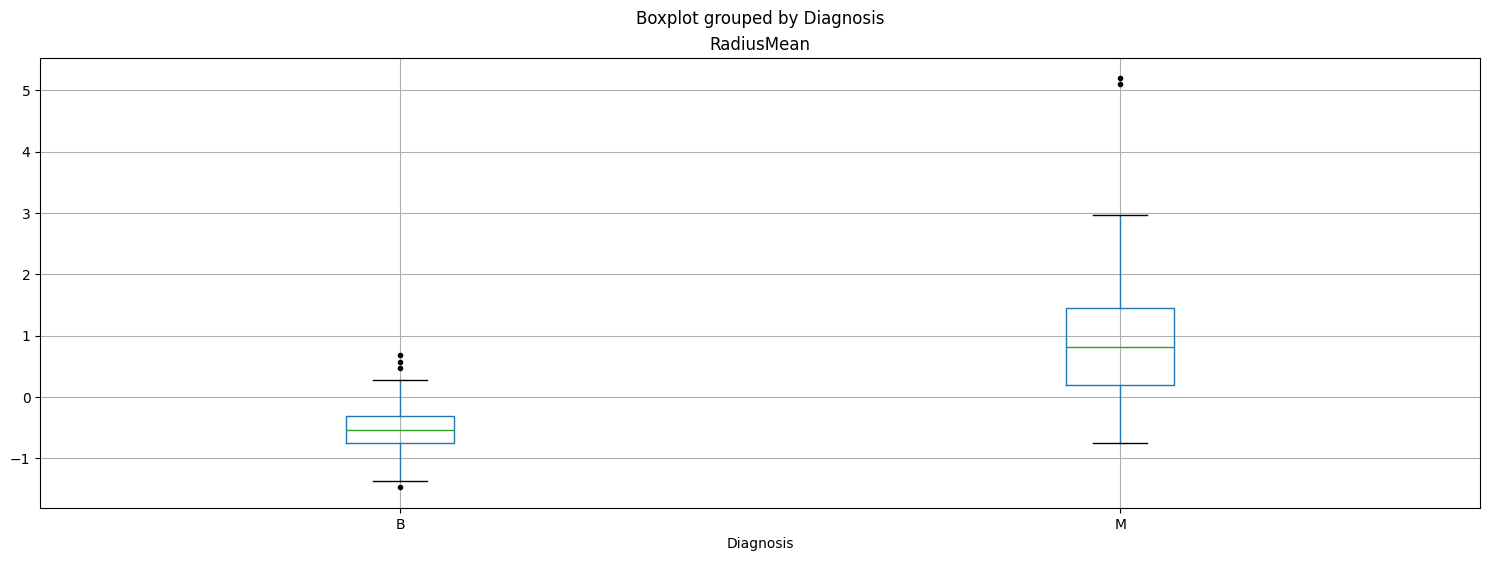

In [267]:
averages_breast_cancer.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))